In [112]:
##"I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work."

In [113]:
!pip install gym

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces

In [115]:
from google.colab import widgets
import time

In [116]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 250
        self.reward= 0

    def reset(self):
        self.timestep = 0        
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.wall1 = [0,1]
        self.wall2 = [3,2]
        self.wall3 = [2,2]
        pos= self.agent_pos[0]*4+self.agent_pos[1]
        self.state = np.zeros([4,4])
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 3
        self.state[tuple(self.wall1)] = 5
        self.state[tuple(self.wall2)] = 5
        self.state[tuple(self.wall3)] = 5
        self.reward=1
        observation = self.state.flatten()
        return pos
    
    def step(self, action):
        if action == 0:
          self.agent_pos[0] += 1
          if self.agent_pos[0] == 4:
            self.agent_pos[0] -= 1
        if action == 1:
          self.agent_pos[0] -= 1
          if self.agent_pos[0] == -1:
            self.agent_pos[0] += 1
        if action == 2:
          self.agent_pos[1] += 1
          if self.agent_pos[1] == 4:
            self.agent_pos[1] -= 1
        if action == 3:
          self.agent_pos[1] -= 1
          if self.agent_pos[1] == -1:
            self.agent_pos[1] += 1
        s_table=np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15]])
        npos = s_table[tuple(self.agent_pos)]
        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 3
        
        r_table= np.array([[-1,-3,-1,-1],[-1,-1,-1,-1],[-1,-1,-3,-1],[-1,-1,-3,100]])
        reward= r_table[tuple(self.agent_pos)]
        self.timestep += 1
        done = True if npos == 15 else False
        info = {}
        return npos, reward, done, info
        
    def render(self):
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 3
        self.state[tuple(self.wall1)] = 5
        self.state[tuple(self.wall2)] = 5
        self.state[tuple(self.wall3)] = 5
        plt.imshow(self.state)

""


4
Training finished.

Total Episodes: 1000
Total Timesteps: 10000
Total Penalties: 7285
Average timesteps per episode: 10.0
Average penalties per episode: 7.285
Q Table:
 [[  5.2112       2.11762984   3.19970098   2.11523666]
 [ 10.35194468   2.4773044    5.07440507   1.75026073]
 [  6.93010127   2.66844889  14.74246985   0.63012013]
 [ 31.75937385   9.12258956  11.64717732   2.44426672]
 [ 10.33495933   2.12070309  10.352        5.20692111]
 [ 18.92         3.20571831  18.32381983   5.2013863 ]
 [ 32.37505961   4.24414798  28.69266778   7.92505434]
 [ 58.76576789  11.9018329   23.02978964  12.82028693]
 [ 16.46934545   4.43386122  18.91964831   8.23825973]
 [ 33.2         10.33853355  32.37316676  10.31224533]
 [ 54.96975849  17.18037335  58.99996059  17.50373897]
 [ 99.99999613  31.97014233  55.88861221  29.65714143]
 [ 13.46455578   8.52942556  33.19743769  14.62466917]
 [ 33.16277447  18.90992399  57.          18.90422115]
 [ 56.88611847  32.24833814 100.          33.0543691 ]
 [  

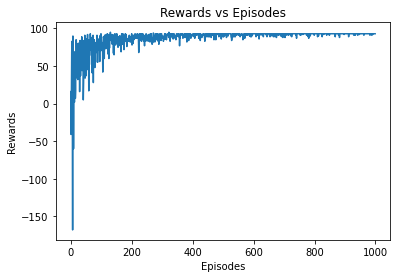

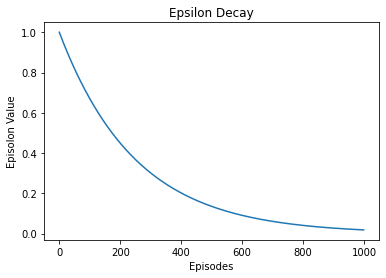

In [117]:
from matplotlib import figure
env = GridEnvironment()
#Creating a Q_Table
q_table = np.zeros([env.observation_space.n, env.action_space.n])
output_grid = widgets.Grid(1, 1)
alpha = 0.1
gamma = 0.6
epsilon = 0.9

# For plotting metrics
total_epochs=0
episodes=1000
t_e= []
t_r = []
t_a=[]
all_epochs = 0
all_penalties = []

for i in range(episodes):
    state = env.reset()
    r=0
    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore 
        else:
            action = np.argmax(q_table[state]) # Exploit 

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -1:
            penalties += 1
        state = next_state
        epochs += 1
        r+=reward
        #if(i>198):
         # with output_grid.output_to(0, 0):
          #  output_grid.clear_cell()
           # env.render()
            #time.sleep(1)        
    t_e.append(epochs) #Timesteps for each Episode
    t_r.append(r)#Rewards for each Episode    
    total_epochs += epochs
    total_penalties += penalties
    epsilon= np.exp(-4*i/episodes)
    t_a.append(epsilon)  
plt.plot(t_r) 
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.figure()
plt.plot(t_a)
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Episolon Value')         
print(penalties)
print("Training finished.\n")
print("Total Episodes:",episodes)
print("Total Timesteps:",total_epochs)
print("Total Penalties:", total_penalties)
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")
print("Q Table:\n", q_table)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

15
Episode: 9


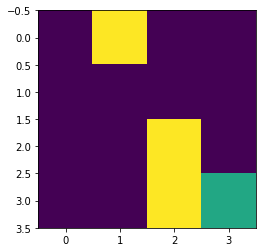

<IPython.core.display.Javascript object>

4
Training finished.

Total Episodes: 10
Total Timesteps: 60
Total Penalties: 40
Results after 10 episodes:
Average timesteps per episode: 6.0
Average penalties per episode: 4.0


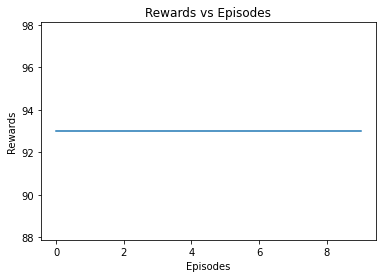

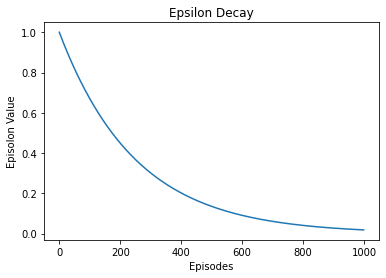

In [118]:
total_epochs, total_penalties = 0, 0
episodes = 10
t_r1=[]
t_e1=[]

for _ in range(episodes):
    r1=0
    state = env.reset()
    epochs, penalties1, reward = 0, 0, 0    
    done = False    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        if reward == -1:
            penalties1 += 1
        r1+=reward    
        epochs += 1
        if(_>8):
          with output_grid.output_to(0, 0):
            output_grid.clear_cell()
            print(state)
            print(f"Episode:", _)
            env.render()  
          time.sleep(1)
    total_epochs += epochs
    total_penalties += penalties1
    t_e1.append(epochs) #Timesteps for each Episode
    t_r1.append(r1) #Rewards for each Episode    
plt.plot(t_r1)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()
plt.plot(t_a)
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Episolon Value')         
print(penalties1)
print("Training finished.\n")
print("Total Episodes:",episodes)
print("Total Timesteps:",total_epochs)
print("Total Penalties:", total_penalties)
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")